In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gold_price = pd.read_csv("/content/gld_price_data.csv")

In [6]:
gold_price.shape

(2290, 6)

In [7]:
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
X = gold_price.drop(columns = ["Date" , "GLD"] , axis = 1)
Y = gold_price["GLD"]

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [11]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [13]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[122.50949929 130.01520377 127.65790006  96.77059783 118.63530065
 114.48379919 124.8567012  117.80699961 108.03810147  98.39659984
  95.38239925 167.5976984  150.33270116 116.54259997 170.94790122
  85.16449989 123.05079874 109.0034969  113.04800106 131.66940286
 124.30939893 113.78990083 116.03939987 108.71099975 108.71370186
 125.80289951 118.52239977 112.7003993  113.58660185 125.55169867
 146.13610112  89.44730007 167.89999972 113.70229946 108.47460116
 120.4244013  141.69519882 161.34110172 174.05659785 153.15350094
 119.22460081 113.32260091 121.33479934 113.79639934 122.06573816
 107.99690079  88.44209945 114.38589923 129.64920265 118.07880108
 103.65020022 129.71070265 107.28639855 160.28980399 131.73630102
 117.8376998  147.13020042 133.94060287  95.75380098 124.48310139
 114.9789992   86.28470066 104.18749899 113.75600049  84.11419938
 122.30593825 116.38919924 113.54530193 166.01140255  92.23250004
  80.2252008  161.10119972 158.87430187 106.62660047 148.60220045
 109.63709

In [16]:
#Accuracy
MSE = metrics.mean_squared_error(Y_test,test_data_prediction)
print(MSE)
Rsquare = metrics.r2_score(Y_test,test_data_prediction)
print(Rsquare)

5.1897790229142835
0.990534780210722


In [17]:
Y_test = list(Y_test)

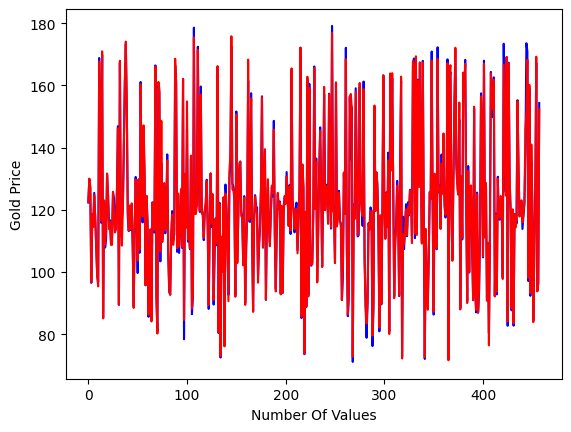

In [22]:
plt.plot(Y_test , color = "Blue" , label = "Actual Values")
plt.plot(test_data_prediction , color = "Red" , label = "Predicted Values")
plt.xlabel("Number Of Values")
plt.ylabel("Gold Price")
plt.show()